# Import libraries

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier,RidgeClassifier,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import  DecisionTreeClassifier


from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,StackingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Loading the Data

In [5]:
data=pd.read_csv("train.csv")

In [6]:
data.tail()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
14391,14391,"Ólafur Arnalds, Alice Sara Ott",Verses,42.0,0.140,0.159,1.0,-17.845,0,0.0401,0.86700,0.917000,0.3920,0.0331,142.239,4.052667,3,7
14392,14392,Citizen Cope,Something to Believe In,50.0,0.659,0.882,5.0,-7.039,1,0.0527,0.04620,0.011500,0.0919,0.8810,156.099,221840.000000,4,10
14393,14393,WurlD,WAYO (KPE LE WU),41.0,0.696,0.535,4.0,-8.053,0,0.1460,0.42100,0.000018,0.1070,0.6620,91.943,196093.000000,4,9
14394,14394,Rafferty,Making a Home,48.0,0.412,0.571,11.0,-6.006,1,0.0387,0.30400,NaN,0.2370,0.4730,159.697,238173.000000,4,9
14395,14395,Machine Head,Is There Anybody out There?,63.0,0.408,0.953,7.0,-3.883,1,0.2260,0.00532,NaN,0.3380,0.2910,177.940,272666.000000,4,10


In [7]:
data.Class.value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

# Data preprocessing
1. drop the irrelevant columns
2. checking if there are any duplicate values
3. Handling missing values
4. Handling columns that skewed towards one end of the distribution (e.g., the right or left) by applying boxcox transform
5. Data Visualizations
6. implement the SMOTE to handling unbalanced in the dataset
7. Feature Scaling

##1.drop the irrelevant columns

In [8]:
# create a copy version of the dataset
df=data.copy()

In [9]:
df.drop(columns=['id','Artist Name','Track Name'],inplace=True)

In [10]:
df.shape

(14396, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          14045 non-null  float64
 1   danceability        14396 non-null  float64
 2   energy              14396 non-null  float64
 3   key                 12784 non-null  float64
 4   loudness            14396 non-null  float64
 5   mode                14396 non-null  int64  
 6   speechiness         14396 non-null  float64
 7   acousticness        14396 non-null  float64
 8   instrumentalness    10837 non-null  float64
 9   liveness            14396 non-null  float64
 10  valence             14396 non-null  float64
 11  tempo               14396 non-null  float64
 12  duration_in min/ms  14396 non-null  float64
 13  time_signature      14396 non-null  int64  
 14  Class               14396 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 1.6 MB


In [12]:
# convert the values of duration from min/ms to min
df['duration_in min/ms']*1000

0        5.209333e+03
1        2.066020e+08
2        2.189600e+08
3        3.324670e+08
4        2.001730e+08
             ...     
14391    4.052667e+03
14392    2.218400e+08
14393    1.960930e+08
14394    2.381730e+08
14395    2.726660e+08
Name: duration_in min/ms, Length: 14396, dtype: float64

In [13]:
df.rename(columns={'duration_in min/ms':'duration_in min'},inplace=True)

##2. checking if there are any duplicate values 

In [14]:
df.duplicated().sum()


29

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.sample(5)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min,time_signature,Class
11308,70.0,0.706,0.824,NaN,-7.959,1,0.0694,0.35500,0.000133,0.1110,0.860,94.980,2.200000,4,9
4981,24.0,0.397,0.769,10.0,-7.042,1,0.0449,0.03580,0.000026,0.9350,0.426,83.718,6.236683,4,9
3605,66.0,0.884,0.639,1.0,-6.832,0,0.2460,0.11100,0.000002,0.6080,0.625,100.049,142176.000000,4,5
12906,43.0,0.717,0.866,2.0,-3.662,1,0.0474,0.24800,NaN,0.3850,0.734,154.889,129117.000000,4,10
11849,65.0,0.436,0.657,5.0,-8.868,1,0.0541,0.00975,0.007480,0.0931,0.210,118.693,467640.000000,4,10


## 3. dealing with missing values

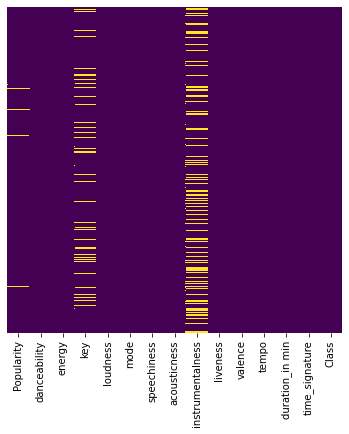

In [18]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Popularity

In [19]:
cols=['Popularity']

for col in cols:
  print(f"number of null in {col}=",df[col].isnull().sum(),"\n")

  get_values=df.groupby("Class").median()[col]
  for i in range(12):
    for k in get_values:
      con=(df[col].isnull()) & (df['Class']==i)
      df.loc[con, col]=k
    
  print(f"number of null in {col}=",df[col].isnull().sum(),"\n")

number of null in Popularity= 351 

number of null in Popularity= 0 



### key

In [20]:
df['key'].value_counts()

7.0     1684
2.0     1588
9.0     1576
1.0     1328
4.0     1233
11.0    1164
5.0     1120
6.0      948
8.0      896
10.0     810
3.0      411
Name: key, dtype: int64

In [21]:
print(f"number of null in key=",df['key'].isnull().sum(),"\n")

SMT1 = df.loc[df['mode']==0]['key'].mode()[0]

SMT2  = df.loc[df['mode']==1]['key'].mode()[0]

C1=(df.key.isnull()) & (df['mode']==0)
C2=(df.key.isnull()) & (df['mode']==1)

df.loc[C1, 'key']=SMT1
df.loc[C2, 'key']=SMT2

print(f"number of null in key=",df['key'].isnull().sum(),"\n")

number of null in key= 1609 

number of null in key= 0 



### instrumentalness

In [22]:
print(f"number of null in instrumentalness=",df['instrumentalness'].isnull().sum(),"\n")

p = SimpleImputer(strategy='median')
df['instrumentalness'] = p.fit_transform(df['instrumentalness'].to_numpy().reshape(-1,1))

print(f"number of null in instrumentalness=",df['instrumentalness'].isnull().sum(),"\n")

number of null in instrumentalness= 3552 

number of null in instrumentalness= 0 



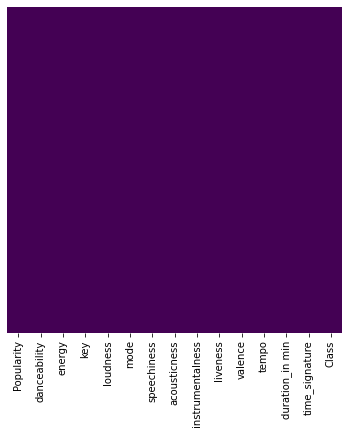

In [23]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##4. Handling the skewed distribution

In [24]:
print(df.skew().sort_values(ascending=False))

# Positive value means the distribution is skewed to the right.
# Negative value means the distribution is skewed to the left.
# 0 means perfect normal distribution. The bell shaped curve.

speechiness         3.075811
liveness            2.181399
instrumentalness    1.982341
acousticness        1.106474
duration_in min     0.831213
tempo               0.380839
valence             0.093459
Popularity          0.093417
danceability       -0.082888
key                -0.156174
mode               -0.576204
Class              -0.666166
energy             -0.667442
loudness           -1.777561
time_signature     -4.219047
dtype: float64


### handling Right Skewed data using boxcox transform 

In [25]:
Right_SkewedColumns=['speechiness','liveness','instrumentalness']
# columns with higher skewed to right
from scipy.stats import boxcox

for i in Right_SkewedColumns:
  print(f'skewed value of {i} before using boxcox transform is=',df[i].skew())
  # skewvals=np.log(df[i])
  skewvals,L=boxcox(df[i])
  df[i]=skewvals
  print(f'skewed value of {i} after using boxcox transform is=',df[i].skew())
  print("________________________________")

skewed value of speechiness before using boxcox transform is= 3.075811439525631
skewed value of speechiness after using boxcox transform is= 0.22401477506230175
________________________________
skewed value of liveness before using boxcox transform is= 2.1813991071421843
skewed value of liveness after using boxcox transform is= 0.012826251556081943
________________________________
skewed value of instrumentalness before using boxcox transform is= 1.9823406355689912
skewed value of instrumentalness after using boxcox transform is= -0.03320432472038288
________________________________


##5.  Data Visualizations

In [26]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = df, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

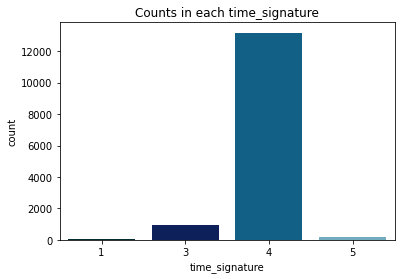

In [27]:
plot_counts("time_signature")

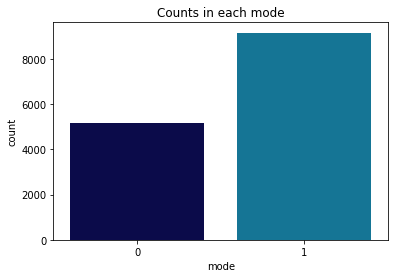

In [28]:
plot_counts("mode")

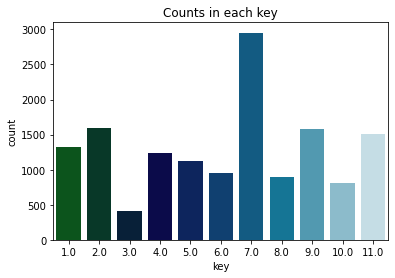

In [29]:
plot_counts("key")

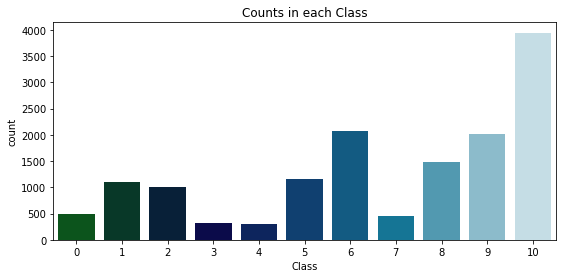

In [30]:
plt.figure(figsize = (9, 4))
plot_counts("Class")

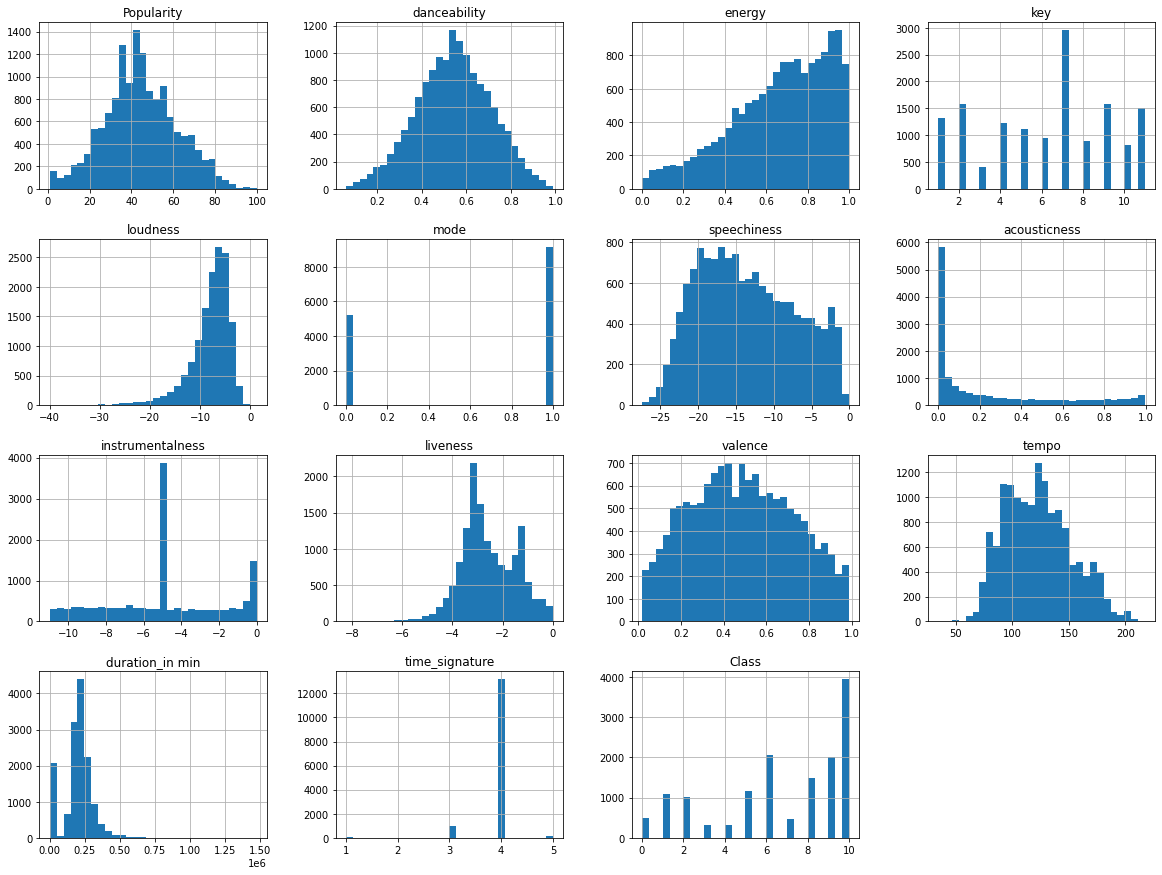

In [31]:
df.hist(bins=30, figsize=(20,15))
plt.show()

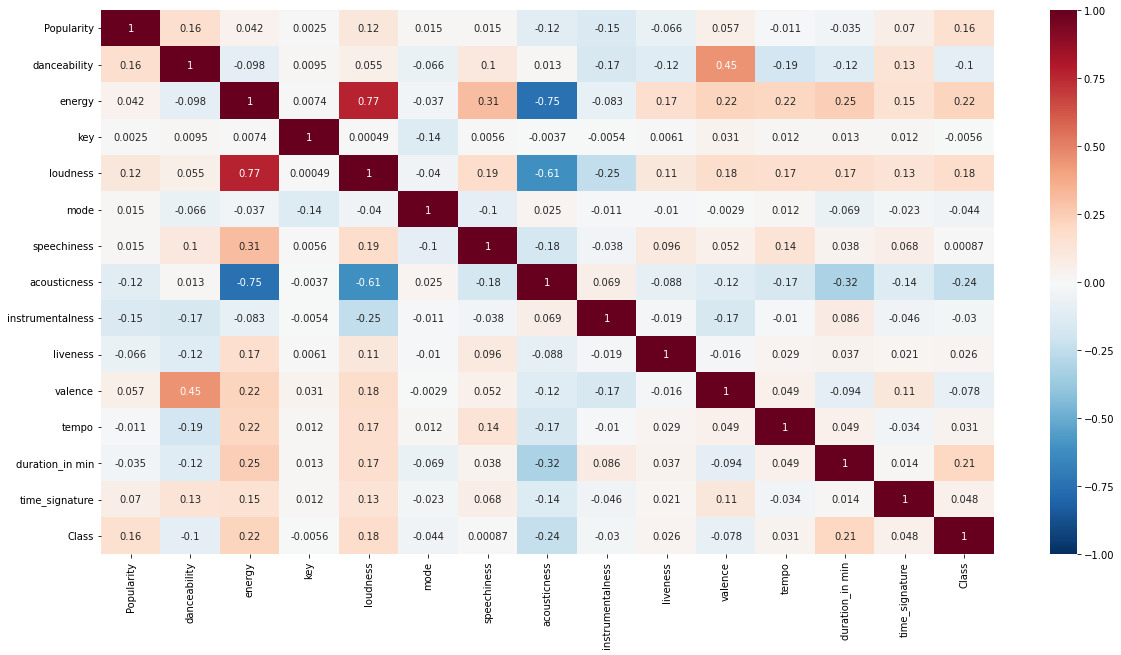

In [32]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

In [33]:
corr['Class'].sort_values(ascending=False) # top 10 with high corr

Class               1.000000
energy              0.221793
duration_in min     0.206087
loudness            0.179715
Popularity          0.157424
time_signature      0.047885
tempo               0.031257
liveness            0.025976
speechiness         0.000868
key                -0.005607
instrumentalness   -0.030045
mode               -0.043988
valence            -0.078187
danceability       -0.101272
acousticness       -0.241116
Name: Class, dtype: float64

##6. implement the SMOTE to handling unbalanced in the dataset

In [34]:
from imblearn.over_sampling import SMOTE

X = df.drop("Class", axis=1)
y = df["Class"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class balance after oversampling
# print("Class balance after oversampling:")
# print(y_resampled.value_counts())

In [35]:
y_resampled.value_counts()

3     3946
5     3946
6     3946
9     3946
1     3946
10    3946
0     3946
7     3946
2     3946
8     3946
4     3946
Name: Class, dtype: int64

## 7. Feature Scaling

In [43]:
X=df.drop(columns='Class')
y=df['Class']
#__________________________________________________________________________________________
# select k best
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(score_func=mutual_info_regression, k=10)
X_selected = selector.fit_transform(X_resampled, y_resampled)
# Check the selected features
print("Selected features:")
print(X.columns[selector.get_support()])

#__________________________________________________________________________________________
X_train, X_test, y_train, y_test = train_test_split(X_selected,y_resampled, test_size=0.2)

st_x= StandardScaler()  

X_train= st_x.fit_transform(X_train)
 
X_test= st_x.transform(X_test) 

Selected features:
Index(['Popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       'duration_in min'],
      dtype='object')


# Models

## LazyClassifier

In [32]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

## LGBMClassifier

In [44]:
LGBMC = LGBMClassifier()
LGBMC.fit(X_train, y_train)
ypred = LGBMC.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,ypred)}")
print('F1: {:.5f}'.format(f1_score(y_test, ypred,average='weighted')))

Accuracy: 0.724026721953467
F1: 0.71645


### LGBMClassifier hyperparameter tuning using GridSearchCV

In [ ]:
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [1.5],
    'lambda_l2': [1]
    }
lgb_estimator = LGBMClassifier()

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid,scoring="accuracy" ,cv=10)
lgb_model = gsearch.fit(X=X_train, y=y_train)

print("best_params=",lgb_model.best_params_)
print("best_score=",lgb_model.best_score_)

ypred = gsearch.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,ypred)}")
print('F1: {:.5f}'.format(f1_score(y_test, ypred,average='weighted')))

In [48]:
# hyperparameter tuning using RandomizedSearchCV

lgb=LGBMClassifier()
#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
clf=RandomizedSearchCV(lgb,param_distributions=parameters,scoring='accuracy',cv=cv,n_iter=5)
clf.fit(X=X_train, y=y_train)

print("best_params=",clf.best_params_)
print("best_score=",clf.best_score_)

ypred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,ypred)}")
print('F1: {:.5f}'.format(f1_score(y_test, ypred,average='weighted')))

best_params= {'reg_alpha': 0, 'num_leaves': 100, 'min_child_samples': 15, 'max_depth': -1, 'learning_rate': 0.1}
best_score= 0.7572860481095555
Accuracy: 0.7543192812715964
F1: 0.74920


## XGBClassifier

In [32]:
xgb_clf =XGBClassifier()
xgb_clf.fit(X_train,y_train)

ypred = xgb_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,ypred)}")
print('F1: {:.5f}'.format(f1_score(y_test, ypred,average='weighted')))

Accuracy: 0.681870536742686
F1: 0.67134


In [ ]:
params = {
    'n_estimators':[100, 300, 500, 800, 1200],
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)],              ## [0.3,0.4,0.5]
    'subsample':[i/10.0 for i in range(6,11)],         ## [0.6 ,0.7 ,0.8 ,0.9, 1.0]
    'colsample_bytree':[i/10.0 for i in range(6,11)],  ## [0.6 ,0.7 ,0.8 ,0.9, 1.0]
    'max_depth': [2,3,4,6,7],
    'objective': ['multi:softmax', 'multi:softprob'],
    'eta': [i/10.0 for i in range(3,6)] ,             ## [0.3,0.4,0.5]
    "random_state":[i for i in range(1,51)]} 

model = XGBClassifier(nthread=-1,num_class=11,booster='gbtree',eval_metric='merror')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

random_searchXGB = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=10 ,cv=cv,scoring='neg_mean_squared_error')

xgb_result= random_searchXGB.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (xgb_result.best_score_, xgb_result.best_params_))
print("_______________________________________________________________________________________")
y_pred = random_searchXGB.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted')))

## RandomForestClassifier

In [45]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
    
print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted')))    

F1: 0.75480


In [50]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
Model2=RandomForestClassifier()
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = RandomizedSearchCV(estimator=Model2,param_distributions=hyperF, cv = 5, verbose = 1, n_jobs = -1, 
                           scoring='neg_mean_squared_error',error_score=0,n_iter=5)       #RandomizedSearchCV

            
bestF = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [51]:
y_pred=gridF.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted'))) 
print("best_params=",gridF.best_params_)
print("best_score=",gridF.best_score_)


Accuracy: 0.764800737157337
F1: 0.75689
best_params= {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
best_score= -6.3034513317275636


## ExtraTreesClassifier

In [53]:
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train)

y_pred = ETC.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.7698686938493434
F1: 0.76060


## SVC

In [39]:
modelSVC = SVC()
modelSVC.fit(X_train, y_train)

y_pred = modelSVC.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.7030638101819857
F1: 0.69266


## HistGradientBoostingClassifier

In [57]:
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted')))

## BaggingClassifier

In [ ]:
BCM = BaggingClassifier()
BCM.fit(X_train, y_train)

y_pred = BCM.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print('F1: {:.3f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.5037037037037037
F1: 0.497


## AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(
    RandomForestClassifier(max_depth=10), n_estimators=100, learning_rate=0.1, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5253472222222222

## GradientBoostingClassifier

In [38]:
modelGBC =GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=800,subsample=0.6)
modelGBC.fit(X_train,y_train)

y_pred = modelGBC.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.7151577977424557
F1: 0.70802


## KNeighborsClassifier

In [55]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train,y_train)

y_pred=modelKNN.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted')))

In [56]:
model = KNeighborsClassifier()
n_neighbors = range(1, 50, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define Rand search
Rand = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

Rand_searchKNN = RandomizedSearchCV(estimator=model, param_distributions=Rand, n_jobs=-1, cv=10,
                                    scoring='neg_mean_squared_error',error_score=0,n_iter=50)

Rand_result = Rand_searchKNN.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (Rand_result.best_score_, Rand_result.best_params_))

y_pred=Rand_searchKNN.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted')))

## VotingClassifier

In [52]:
LGB_clf = LGBMClassifier(lambda_l1= 1.5, lambda_l2=1, min_data_in_leaf=400, num_leaves=31, reg_alpha=0.1)

Histclasifer=HistGradientBoostingClassifier(learning_rate=0.1, max_leaf_nodes=10)

rnd_clf = RandomForestClassifier(n_estimators=100)

svm_clf = SVC(kernel= 'rbf',gamma='scale', C=1.0)

GB_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=800,subsample=0.6)

xgb_clf =XGBClassifier()

ETC = ExtraTreesClassifier()

voting_clf = VotingClassifier(
    estimators=[('LGB', LGB_clf), ('rf', rnd_clf),('svm',svm_clf),("GB",GB_clf),("HG",Histclasifer),("xgb",xgb_clf),("etc",ETC)],
    voting='hard')
# voting_clf.fit(X_train, y_train)

for clf in (LGB_clf, rnd_clf,svm_clf,GB_clf,Histclasifer,xgb_clf,ETC, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"reuslt of {clf}")
    print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
    print('F1: {:.5f}'.format(f1_score(y_test, y_pred,average='weighted')))
    print("____________________________________________________")

reuslt of LGBMClassifier(lambda_l1=1.5, lambda_l2=1, min_data_in_leaf=400, reg_alpha=0.1)
Accuracy: 0.7036397143515319
F1: 0.69634
____________________________________________________
reuslt of RandomForestClassifier()
Accuracy: 0.7593872379636029
F1: 0.75134
____________________________________________________
reuslt of SVC()
Accuracy: 0.6734623358673116
F1: 0.66302
____________________________________________________
reuslt of GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=800,
                           subsample=0.6)
Accuracy: 0.6882054826076941
F1: 0.67942
____________________________________________________
reuslt of HistGradientBoostingClassifier(max_leaf_nodes=10)
Accuracy: 0.7004146510020732
F1: 0.69242
____________________________________________________
reuslt of XGBClassifier(objective='multi:softprob')
Accuracy: 0.6614835291407509
F1: 0.64858
____________________________________________________
reuslt of ExtraTreesClassifier()
Accuracy: 0.77079014